In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
from google.colab import files
uploaded =files.upload()

Saving Diabetes.csv to Diabetes.csv


In [27]:
print(data.head())
print(data.isnull().sum())

   Pregnancies  Glucose  Blood Pressure  Skin Thickness  Insulin   BMI  Age  \
0            6      148              72       35.000000   223.25  33.6   50   
1            1       85              66       29.000000   223.25  26.6   31   
2            8      183              64       33.166667   223.25  23.3   32   
3            1       89              66       23.000000    94.00  28.1   21   
4            0      137              40       35.000000   168.00  43.1   33   

   Outcome  
0        1  
1        0  
2        0  
3        0  
4        1  
Pregnancies       0
Glucose           0
Blood Pressure    0
Skin Thickness    0
Insulin           0
BMI               0
Age               0
Outcome           0
dtype: int64


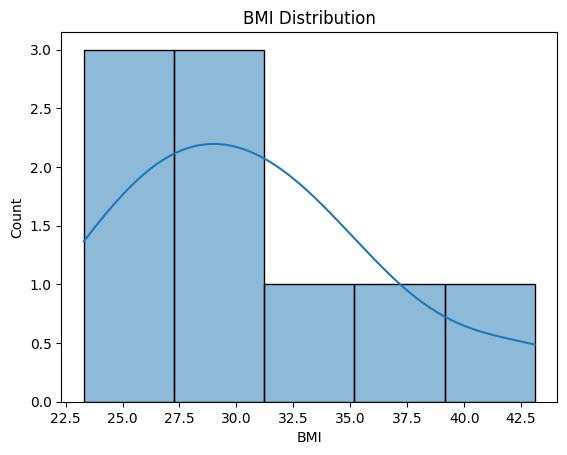

In [33]:
sns.histplot(data['BMI'], kde=True)
plt.title('BMI Distribution')
plt.show()

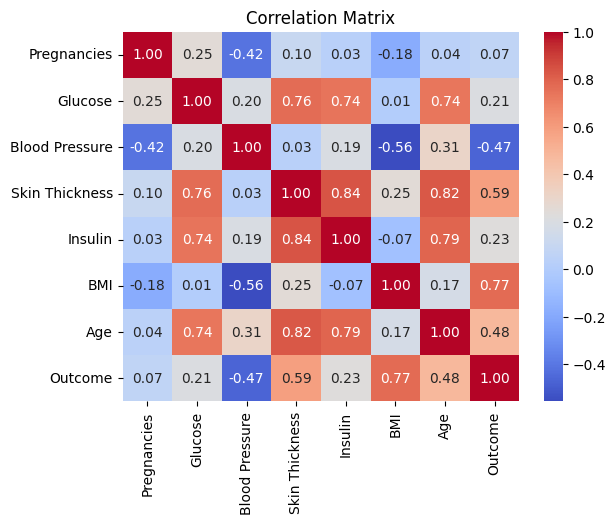

In [34]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [20]:
for file_name in uploaded.keys():
    data = pd.read_csv(file_name)
    break
data['Outcome'] = (data['BMI'] > 30).astype(int)
print("Columns in dataset:", data.columns)
print(data.head())

Columns in dataset: Index(['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
       'BMI', 'Age', 'Outcome'],
      dtype='object')
   Pregnancies  Glucose  Blood Pressure  Skin Thickness  Insulin   BMI  Age  \
0            6      148              72              35        0  33.6   50   
1            1       85              66              29        0  26.6   31   
2            8      183              64               0        0  23.3   32   
3            1       89              66              23       94  28.1   21   
4            0      137              40              35      168  43.1   33   

   Outcome  
0        1  
1        0  
2        0  
3        0  
4        1  


In [39]:
columns_with_zeros = ['Skin Thickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='mean')
data[columns_with_zeros] = imputer.fit_transform(data[columns_with_zeros])
X = data.drop('Outcome', axis=1)
y = data['Outcome']
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=3, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {cv_scores.mean()}')

Cross-validation scores: [1.         0.33333333 0.66666667]
Mean accuracy: 0.6666666666666666


In [43]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 10, 'n_estimators': 100}


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



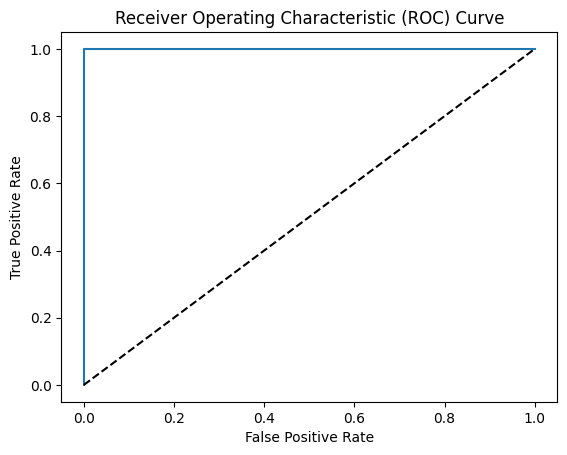

AUC Score: 1.0


In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
auc_score = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc_score}')